## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import metrics


## Data Collection and Processing

In [2]:
# Loading a csv Dataframe to Pandas Datafame
gold_data = pd.read_csv("/content/gld_price_data.csv")
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# Checking the shape of the dataset
gold_data.shape

(2290, 6)

In [4]:
#Checking the null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# Getting the basic values of the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# Getting the statistical measures of the dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [44]:
# converting date columne to numeric format
gold_data["Date"] = pd.to_numeric(gold_data["Date"], errors="coerce")

In [45]:
# Finding the correlation in the dataset
correlation = gold_data.corr()

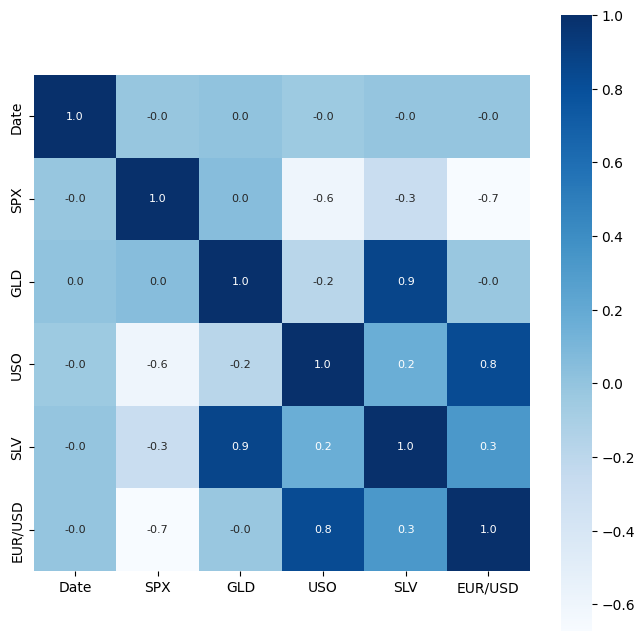

In [50]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues');

In [51]:
# Correlation values of GLT
print(correlation["GLD"])

Date       0.012484
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-53-8af0ed7a4d6d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data["GLD"], color="blue");


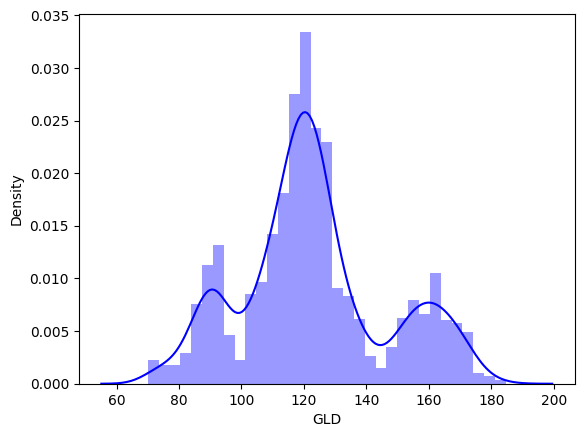

In [53]:
#Checking the distribution of the gold price
sns.distplot(gold_data["GLD"], color="blue");

##Spliting the features and target

In [54]:
x = gold_data.drop(["Date", "GLD"], axis=1)
y = gold_data["GLD"]

In [61]:
#Spliting into train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Model Training

In [64]:
model = RandomForestRegressor(n_estimators=100)

In [65]:
model.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

In [68]:
test_data_prediction = model.predict(x_test)

In [69]:
print(test_data_prediction)

[168.74789932  82.20939992 116.09080061 127.65620083 120.82070125
 154.92949811 150.47589795 126.07360058 117.50819885 126.07880082
 116.61870112 171.83360077 142.18869908 167.74509824 115.11950023
 117.60790034 138.58780304 169.87190012 160.11850332 156.28689975
 154.78619989 125.26270006 176.29409873 157.29900361 125.14700018
  93.83939972  77.66160002 120.7612     119.12509964 167.31730054
  88.14310052 125.31550033  91.15340062 117.54610026 121.0217994
 135.95340093 115.38750142 115.28750045 147.44119932 107.23420083
 104.61190259  87.22869796 126.45250055 117.76509983 152.15029894
 119.80269997 108.37349976 108.12409889  93.21910043 127.06239779
  75.21580027 113.6787989  121.31980051 111.21139901 118.87319893
 120.84469951 159.40439951 166.0389012  146.86029677  85.74789825
  94.40560045  86.82929868  90.59840038 118.89730049 126.49820043
 127.48349992 169.82360056 122.27369934 117.48369884  98.32690043
 168.52250174 142.74629828 131.97110254 121.10790215 121.28809919
 119.743400

In [73]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9890159980226538


Visualize the Actual Values and Predicted Values in a plot

In [78]:
y_test = list(y_test)

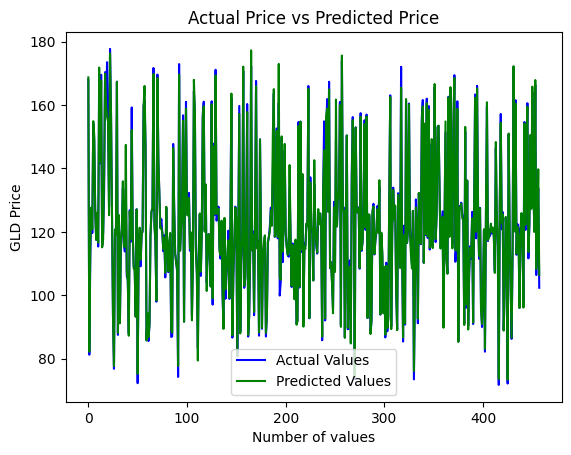

In [80]:
plt.plot(y_test, color="blue", label="Actual Values")
plt.plot(test_data_prediction, color="green", label= "Predicted Values")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()